<a href="https://colab.research.google.com/github/andreifinski/datascience-mentoring/blob/main/Task1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1: EDA (8 max)**

Evaluation criteria 

* Univariate analysis (consider features separately, their distribution, descriptive statistics, anomalies, omissions, etc.) - 4 points;

* Multivariate analysis (consider features in pairs, try to introduce new features to consider their relationship with other features, etc.) - 4 points;

**Part 2: DP (6 max)**
Prepare data to dimensionality reduction step: 

* Fill missing values if needed, explain the selected strategy - 2 points

* Deal with outliers  if needed, explain the selected strategy - 2 points

* Prepare categorical data if needed - 2 points

**Part 3: DR (10 max)**

Overview

Use the same dataset you've used during this module. It would be nice if you save the result from the data preparation step and use it in the current task.

The main goal here is to use different dimensionality reduction techniques and show results

**Evaluation criteria**

* at least 3 different dimensionality reductions techniques (SVD, t-SNE, PCA, NMF, UMAP) used - 4 points

* add visualizations for 3 different dimensionality reductions techniques - 3 points

* calculate explained variance for 2 different dimensionality reductions techniques - 1 point

* select the best number of components for at least 1 dimensionality reduction technique - 2 point

**General criteria for whole work (12 max)**

* The presence of informative visualizations (the presence of headings, axis labels, legends, etc.) - 3 points;

* Explanations and comments regarding data actions performed - 3 points; 

* Active code reuse (helper methods, classes, etc.) -3 points.

The presence of a clear structure in the work (introduction, separate sections on the issues under investigation, conclusion, further steps to take) - 3 points;


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url='https://drive.google.com/file/d/1mCPUi9nHDHAfHGYf0oi-tnhbkCGTb_Mg/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
bank_data = pd.read_csv(url2, sep=";")

display(bank_data.head(20))
print(bank_data.info())
print(bank_data.describe())
print(bank_data.shape)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Quick overview

In [ ]:
bank_data.head()
str(bank_data)
data = bank_data.describe()
data.head(8)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Some data visualizations

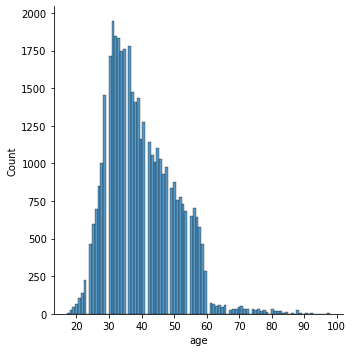

In [ ]:
# age distribution
sns.displot(bank_data['age'])

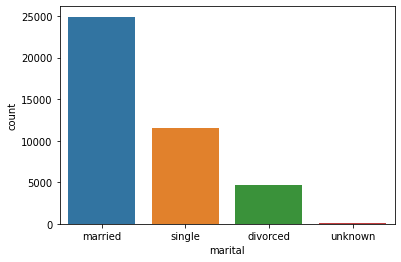

In [ ]:
# marital status
sns.countplot(x = "marital", data = bank_data)

[Text(0, 0, 'basic.4y'),
 Text(0, 0, 'high.school'),
 Text(0, 0, 'basic.6y'),
 Text(0, 0, 'basic.9y'),
 Text(0, 0, 'professional.course'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'university.degree'),
 Text(0, 0, 'illiterate')]

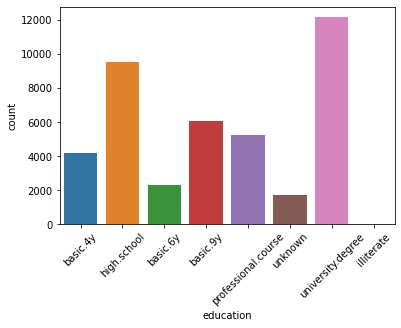

In [ ]:
# edu distribution
edu_plot = sns.countplot(x = "education", data = bank_data)
edu_plot.set_xticklabels(edu_plot.get_xticklabels(), rotation=45)

[Text(0, 0, 'housemaid'),
 Text(0, 0, 'services'),
 Text(0, 0, 'admin.'),
 Text(0, 0, 'blue-collar'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'management'),
 Text(0, 0, 'unemployed'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'student')]

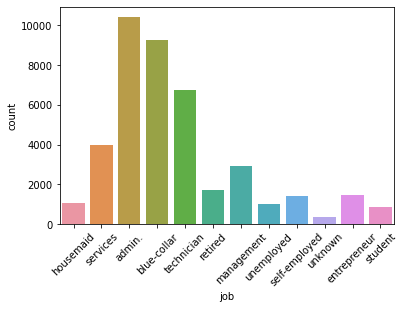

In [ ]:
# jobs distribution
job_plot = sns.countplot(x = "job", data = bank_data)
job_plot.set_xticklabels(job_plot.get_xticklabels(), rotation=45)

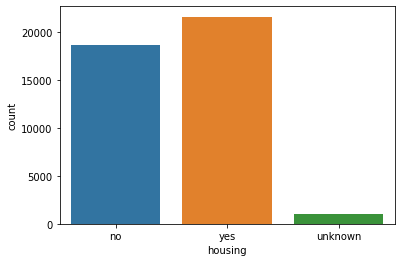

In [ ]:
# housing loans
sns.countplot(x = "housing", data = bank_data)

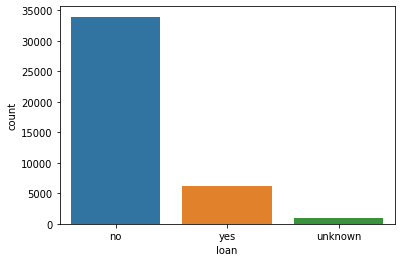

In [ ]:
# personal loans
sns.countplot(x = "loan", data = bank_data)

In [ ]:

print("Number of people with Housing loan: ", bank_data[bank_data['housing'] == 'yes']['housing'].count())
print("Number of people with no Housing loan: ", bank_data[bank_data['housing'] == 'no']['housing'].count())
print("Number of people who's Housing loan is unknown: ", bank_data[bank_data['housing'] == 'unknown']['housing'].count())
print("Number of people with Personal loan: ", bank_data[bank_data['loan'] == 'yes']['loan'].count())
print("Number of people with no Personal loan: ", bank_data[bank_data['loan'] == 'no']['loan'].count())
print("Number of people who's Personal loan is unknown: ", bank_data[bank_data['loan'] == 'unknown']['loan'].count())

Number of people with Housing loan:  21576
Number of people with no Housing loan:  18622
Number of people who's Housing loan is unknown:  990
Number of people with Personal loan:  6248
Number of people with no Personal loan:  33950
Number of people who's Personal loan is unknown:  990


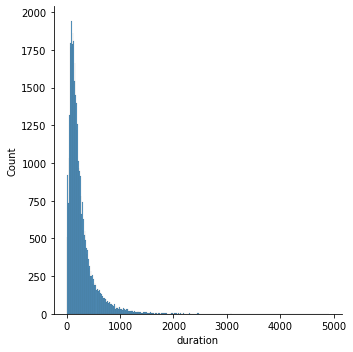

In [ ]:
# call duration
# bank_data['duration'].plot(kind='kde')
# plt.show()
# sns.kdeplot(x = "duration", data = bank_data, gridsize=20)
sns.displot(bank_data['duration'])

In [ ]:
print("Min duration: ", bank_data['duration'].min())
print("Max duration: ", bank_data['duration'].max())
print("Median: ", bank_data['duration'].mean())
print("Standard diveation: ", bank_data["duration"].std())

Min duration:  0
Max duration:  4918
Median:  258.2850101971448
Standard diveation:  259.2792488364648


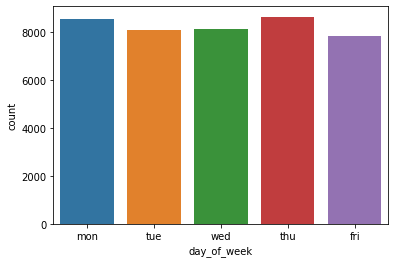

In [ ]:
# Breakdown between days of week
sns.countplot(x="day_of_week", data=bank_data)

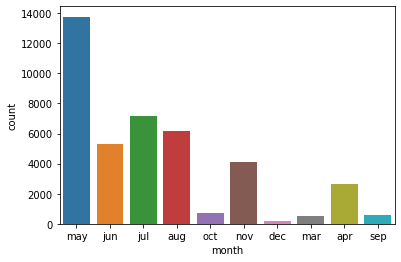

In [ ]:
# Breakdown by months
sns.countplot(x="month", data=bank_data)

So there was some May campaign

Need to check if more time was spent on specific jobs

[Text(0, 0, 'housemaid'),
 Text(0, 0, 'services'),
 Text(0, 0, 'admin.'),
 Text(0, 0, 'blue-collar'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'management'),
 Text(0, 0, 'unemployed'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'student')]

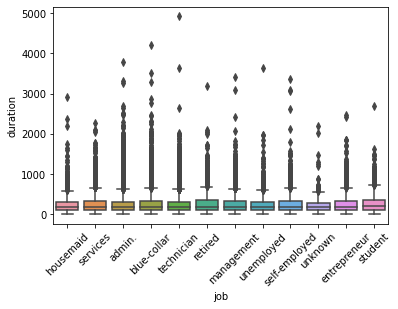

In [ ]:
job_dur_plot = sns.boxplot(x="job", y="duration", data=bank_data, )
job_dur_plot.set_xticklabels(job_dur_plot.get_xticklabels(), rotation=45)

Maybe more time spent on less educated?

[Text(0, 0, 'basic.4y'),
 Text(0, 0, 'high.school'),
 Text(0, 0, 'basic.6y'),
 Text(0, 0, 'basic.9y'),
 Text(0, 0, 'professional.course'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'university.degree'),
 Text(0, 0, 'illiterate')]

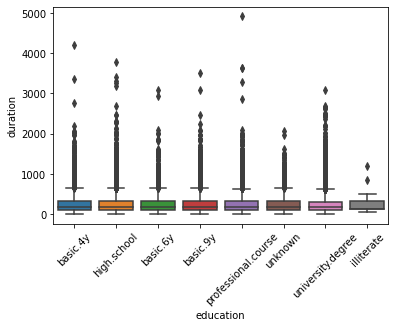

In [ ]:
job_dur_plot = sns.boxplot(x="education", y="duration", data=bank_data)
job_dur_plot.set_xticklabels(job_dur_plot.get_xticklabels(), rotation=45)

Let's see if there were previous campaigns

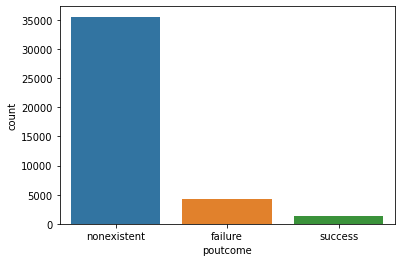

In [ ]:
sns.countplot(x="poutcome", data=bank_data)

Now let's check success rate for prev campaigns

In [ ]:
bank_data[bank_data["poutcome"]=="success"].size/bank_data[bank_data["poutcome"].isin(["failure","success"])].size

0.24408888888888888

See success distribution related to duration for prev campaigns

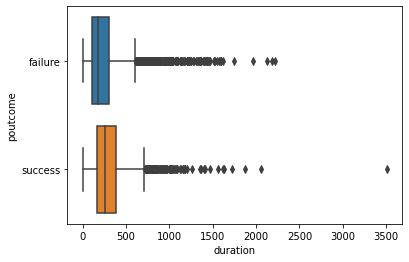

In [ ]:
sns.boxplot(x="duration", y="poutcome", data=bank_data[bank_data["poutcome"].isin(["failure","success"])])

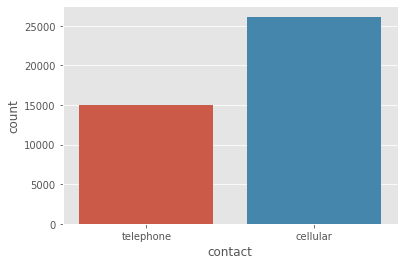

In [ ]:
sns.countplot(x="contact", data=bank_data)

Let's check prev campaign success distribution for unemployed vs employed, let's do breakdown first

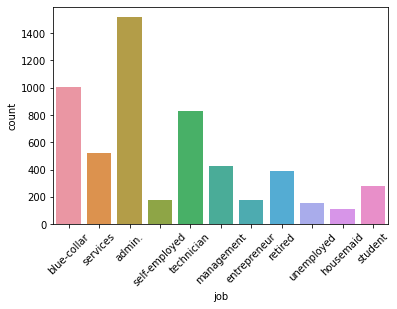

In [ ]:
prev_camp_df=bank_data[bank_data["poutcome"].isin(["failure","success"])]
known_status=prev_camp_df[prev_camp_df["job"]!="unknown"]

job_plot = sns.countplot(x = "job", data = known_status)
job_plot.set_xticklabels(job_plot.get_xticklabels(), rotation=45);

Let's clean up outliers using simple quantiles clean up

[Text(0, 0, 'basic.4y'),
 Text(0, 0, 'high.school'),
 Text(0, 0, 'basic.6y'),
 Text(0, 0, 'basic.9y'),
 Text(0, 0, 'professional.course'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'university.degree'),
 Text(0, 0, 'illiterate')]

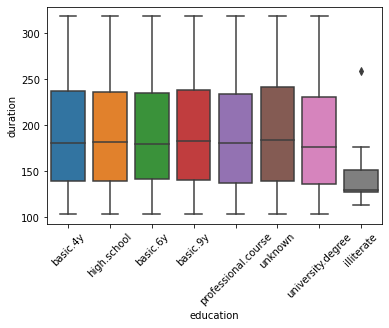

In [ ]:
#data_mod = bank_data[mad_based_outlier(bank_data["duration"])]
# 0.99 - better choice, regularly - IQR = (q_hi-q_low)*1.5, 
q_low = bank_data["duration"].quantile(0.25)
q_hi  = bank_data["duration"].quantile(0.75)

q_cut = bank_data[(bank_data["duration"] < q_hi) & (bank_data["duration"] > q_low)]

mod_dur_plot = sns.boxplot(x="education", y="duration", data=q_cut)
mod_dur_plot.set_xticklabels(mod_dur_plot.get_xticklabels(), rotation=45)

Now let's see what happens after MAD (median absolute deviation) based on median and deviation from it

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':


[Text(0, 0, 'basic.4y'),
 Text(0, 0, 'high.school'),
 Text(0, 0, 'basic.6y'),
 Text(0, 0, 'basic.9y'),
 Text(0, 0, 'professional.course'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'university.degree'),
 Text(0, 0, 'illiterate')]

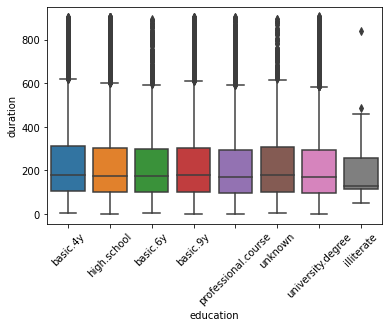

In [ ]:
# function definition

from scipy.stats import norm
 
def mad_based_outlier(dataset, thresh=3.5):
    if type(dataset) is list:
        points = np.asarray(dataset)
    if len(dataset.shape) == 1:
        dataset = dataset[:, None]
    med = np.median(dataset, axis=0)
    abs_dev = np.absolute(dataset - med)
    med_abs_dev = np.median(abs_dev)
 
    mod_z_score = norm.ppf(0.6745) * abs_dev / med_abs_dev

    return mod_z_score > thresh

mad_data = bank_data[~mad_based_outlier(bank_data["duration"])]

mod_dur_plot = sns.boxplot(x="education", y="duration", data=mad_data)
mod_dur_plot.set_xticklabels(mod_dur_plot.get_xticklabels(), rotation=45)

See some correlation

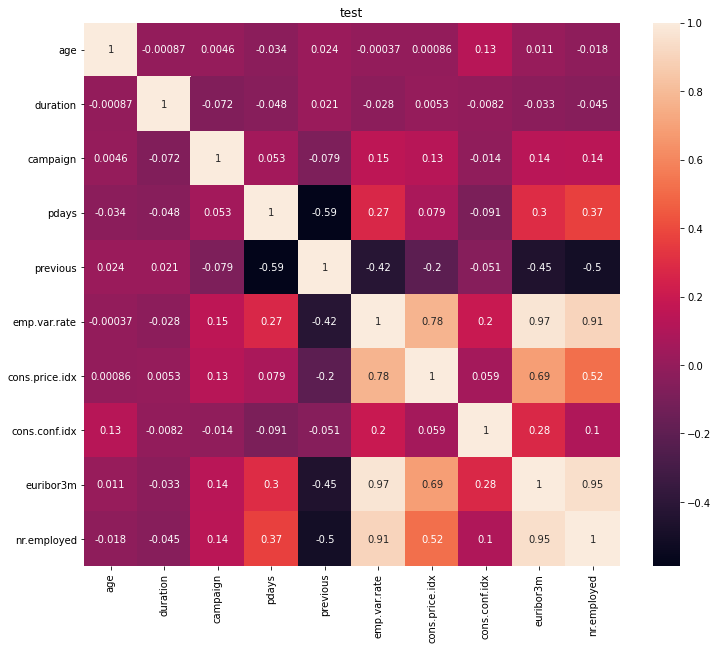

In [ ]:
plt.figure(figsize=[12,10]);
plt.title('test')
sns.heatmap(bank_data.corr(), annot=True);

# how to check features combination?
# find best one (linear -> just coefficient) -> combine with the next one ascending
# check scikit learn

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

np.corrcoef(bank_data["age"], bank_data["duration"])

array([[ 1.0000000e+00, -8.6570501e-04],
       [-8.6570501e-04,  1.0000000e+00]])

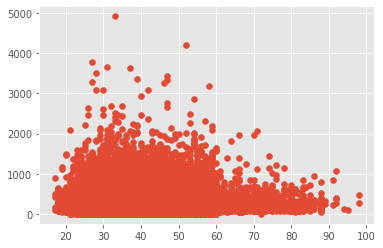

In [ ]:
plt.scatter(bank_data["age"], bank_data["duration"])
plt.show()

Ok, now to categorical and crosstab. How had education improved chanced of mariage and divorce?

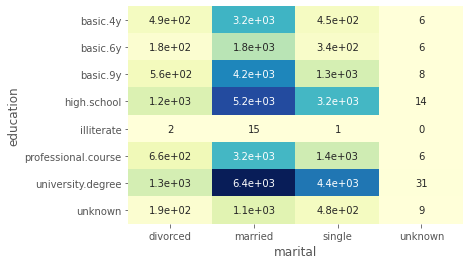

In [ ]:
sns.heatmap(pd.crosstab(bank_data.education, bank_data.marital),
            cmap="YlGnBu", annot=True, cbar=False)
#anova method in statistics - will be later

Will that at least help with better job?

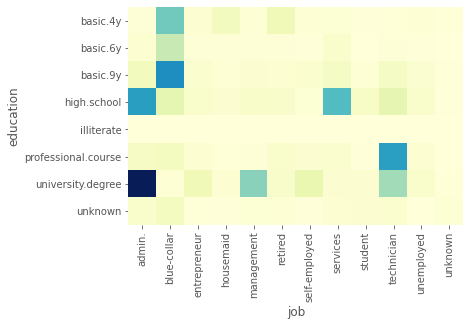

In [ ]:
sns.heatmap(pd.crosstab(bank_data.education, bank_data.job),
            cmap="YlGnBu", cbar=False)

Let's normalize the data

In [13]:
import pandas as pd

url='https://drive.google.com/file/d/1mCPUi9nHDHAfHGYf0oi-tnhbkCGTb_Mg/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
bank_data = pd.read_csv(url2, sep=";")

bank_data.dropna(how="all")
bank_data.drop_duplicates()
bank_data = bank_data.fillna({
    "duration": 0,
    "job": "unknown",
    "marital": "unknown",
    "default": "unknown",
    "education": "unknown",
    "housing": "unknown"})
bank_data["y"]=bank_data["y"].replace(["yes", "no", "unknown"], [1,-1,0])
bank_data["loan"]=bank_data["loan"].replace(["yes", "no", "unknown"], [1,-1,0])
bank_data["housing"]=bank_data["housing"].replace(["yes", "no", "unknown"], [1,-1,0])
bank_data["default"]=bank_data["default"].replace(["yes", "no", "unknown"], [1,-1,0])
bank_data["contact"]=bank_data["contact"].replace(["telephone", "cellular"], [0,1])
bank_data["poutcome"]=bank_data["poutcome"].replace(["failure", "nonexistent", "success"], [-1,0,1])
bank_data["month"]=bank_data["month"].replace(
    ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    [1,2,3,4,5,6,7,8,9,10,11,12])
bank_data["day_of_week"]=bank_data["day_of_week"].replace(["mon", "tue", "wed", "thu", "fri"], [1,2,3,4,5])
bank_data["education"]=bank_data["education"].replace(
    ["unknown","basic.4y","high.school","basic.6y","basic.9y","professional.course","university.degree","illiterate"],
    [0,1,2,3,4,5,6,7])
bank_data["job"]=bank_data["job"].replace(
    ["unknown","housemaid","services","admin.","blue-collar","technician","retired","management","unemployed","self-employed","entrepreneur","student"],
    [0,1,2,3,4,5,6,7,8,9,10,11])
bank_data["marital"]=bank_data["marital"].replace(
    ["unknown", "married", "single", "divorced"],
    [0,1,2,3])
bank_data.head(8)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,1,1,-1,-1,-1,0,5,1,261,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,-1
1,57,2,1,2,0,-1,-1,0,5,1,149,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,-1
2,37,2,1,2,-1,1,-1,0,5,1,226,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,-1
3,40,3,1,3,-1,-1,-1,0,5,1,151,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,-1
4,56,2,1,2,-1,-1,1,0,5,1,307,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,-1
5,45,2,1,4,0,-1,-1,0,5,1,198,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,-1
6,59,3,1,5,-1,-1,-1,0,5,1,139,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,-1
7,41,4,1,0,0,-1,-1,0,5,1,217,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,-1


In [14]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

bd_normalized = preprocessing.normalize(bank_data, norm='l2')
scaler = preprocessing.StandardScaler().fit(bd_normalized)
bd_scaled = scaler.transform(bd_normalized)

#numpy array -> can be feeded into dataframe if needed
bd_scaled

#can be done in the pipeline
#enc.fit(bank_data)
#enc.transform(bank_data)
#bank_data.head(8)
#transformer.fit_transform(bank_data)
#data_scaled = scaler.fit_transform(bank_data)

array([[ 1.49441966, -1.53802531, -0.7328297 , ...,  0.72763756,
         0.07747801, -0.35176127],
       [ 1.59340896, -1.10520554, -0.73165365, ...,  0.72996109,
         0.18842199, -0.35304284],
       [-0.30140153, -1.10562249, -0.73234717, ...,  0.72859089,
         0.12299795, -0.35228709],
       ...,
       [ 1.73041254,  0.73806054, -0.66878015, ..., -1.48450204,
        -0.08542965, -0.42155782],
       [ 0.53155487,  0.27976664, -0.67338914, ..., -1.48642936,
        -0.5011777 ,  2.84591303],
       [ 3.50530902,  0.7368101 , -0.66947343, ..., -1.48479194,
        -0.14796644, -0.42080233]])

Time to reduce dimensions
Starting from PCA:
get the data -> covarians matrix -> eigen vectors + eigen values -> sort and cut those at the bottom

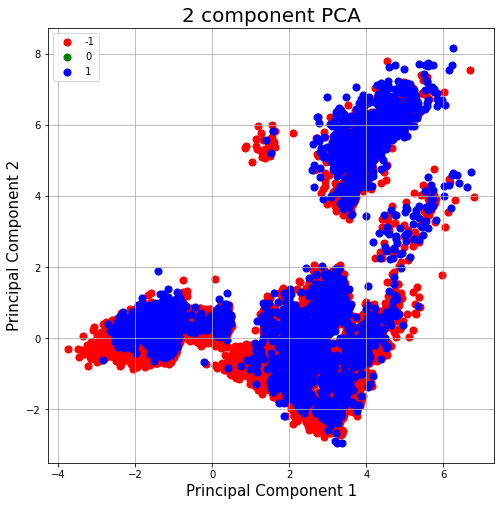

In [15]:
# Separating out the features
features = ["age", "job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "duration",	"campaign","pdays", "previous", "poutcome", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
x = bank_data.loc[:, features].values
from sklearn.preprocessing import StandardScaler
# Standardizing the features
x = StandardScaler().fit_transform(x)

# Separating out the target
y = bank_data.loc[:,['y']].values

# Crazy projection to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, bank_data[['y']]], axis = 1)

# Visualization
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [-1, 0, 1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()



Check what we've lost

In [ ]:
pca.explained_variance_ratio_

array([0.21264297, 0.08430393])

Like 70% :) Normally folks leave ~95%

Let's now do the TSVD breakdown

Ok, before doing that - let's see optiomal amount of components

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np

bd_sparse = csr_matrix(bd_scaled)

In [8]:
# Run Truncated Singular Value Decomposition
# Create and run an TSVD with one less than number of features
tsvd = TruncatedSVD(n_components=bd_sparse.shape[1]-1)
bd_tsvd = tsvd.fit(bank_data)

#Create List Of Explained Variances
# List of explained variances
tsvd_var_ratios = tsvd.explained_variance_ratio_

# Create Function Calculating Number Of Components Required To Pass Threshold
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    # Set initial number of features
    n_components = 0
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        # Add the explained variance to the total
        total_variance += explained_variance
        # Add one to the number of components
        n_components += 1
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
    # Return the number of components
    return n_components

# Run Function
select_n_components(tsvd_var_ratios, 0.95)

3

In [9]:
def reduce(dim):
    svd = TruncatedSVD(n_components=dim, n_iter=7, random_state=42)
    return svd.fit(bank_data)

svd = reduce(3)


Let's see accuracy

In [10]:
svd.explained_variance_ratio_.sum()

0.9984859370696549

Time for T-SNE

In [20]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 41188 samples in 0.448s...
[t-SNE] Computed neighbors for 41188 samples in 58.012s...
[t-SNE] Computed conditional probabilities for sample 1000 / 41188
[t-SNE] Computed conditional probabilities for sample 2000 / 41188
[t-SNE] Computed conditional probabilities for sample 3000 / 41188
[t-SNE] Computed conditional probabilities for sample 4000 / 41188
[t-SNE] Computed conditional probabilities for sample 5000 / 41188
[t-SNE] Computed conditional probabilities for sample 6000 / 41188
[t-SNE] Computed conditional probabilities for sample 7000 / 41188
[t-SNE] Computed conditional probabilities for sample 8000 / 41188
[t-SNE] Computed conditional probabilities for sample 9000 / 41188
[t-SNE] Computed conditional probabilities for sample 10000 / 41188
[t-SNE] Computed conditional probabilities for sample 11000 / 41188
[t-SNE] Computed conditional probabilities for sample 12000 / 41188
[t-SNE] Computed conditional probabilities for s

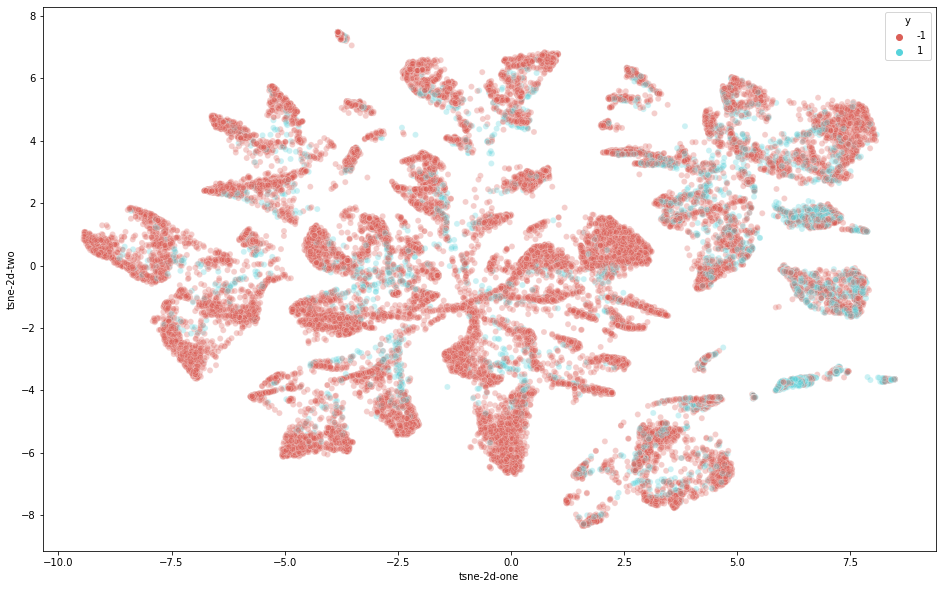

In [26]:
finalDf['tsne-2d-one'] = tsne_results[:,0]
finalDf['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=finalDf,
    legend="full",
    alpha=0.3
)